In [2]:
#%matplotlib qt5
%matplotlib inline

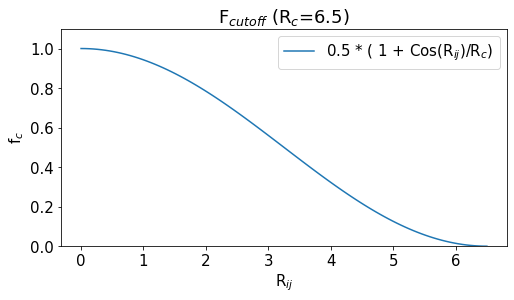

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.size']=15                        # font.size do effect on figure.figsize

### Cutoff function: Cosine(x)

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
                                                  
Rc = 6.5               # R_cut as Angstrom
Rij = np.linspace(0, 6.5, 100)
label = "0.5 * ( 1 + Cos(R$_{ij}$)/R$_c$)"
fc = 0.5 * (1 + np.cos(np.pi * Rij/Rc))
ax.set_xlabel('R$_{ij}$')   #, fontsize=18)
ax.set_ylabel('f$_c$')     #, fontsize=18)
ax.set_ylim(0.,1.1)
#ax.set_xlim(0, 2*np.pi)
plt.title("F$_{cutoff}$ (R$_c$=%3.1f)" % Rc)

plt.plot(Rij, fc, label=label)
plt.legend()

plt.show()

[ 0.1         0.58480355  3.41995189 20.        ]


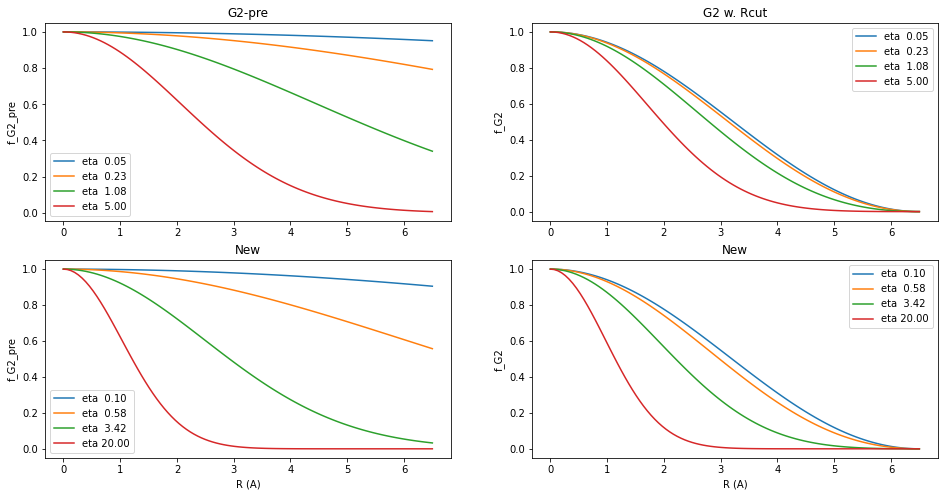

In [3]:
### G2 function for distance

fig, ax = plt.subplots(2,2, figsize=(16, 8))

### G2 parameters
Rs = 0
etas = np.logspace(np.log10(0.05), np.log10(5.), num=4)
#etas = [0.05, 0.23, 1.077, 5.0]
for eta in etas:
    f_g2_pre = np.exp(-np.array(eta)*(Rij-Rs)**2/Rc**2) 
    #label = f''
    ax[0,0].plot(Rij, f_g2_pre, label=f'eta {eta:5.2f}')
    f_g2     = f_g2_pre * fc
    ax[0,1].plot(Rij, f_g2, label=f'eta {eta:5.2f}')
#ax[0,0].set_xlabel('R'     ) #, fontsize=18)                    # R$_{cut}$
ax[0,0].set_ylabel('f_G2_pre'  ) #, fontsize=18)
ax[0,0].set_title('G2-pre'     ) #, fontsize=18)
#ax[0,1].set_xlabel('R'     )
ax[0,1].set_ylabel('f_G2'      ) #, fontsize=18)
ax[0,1].set_title('G2 w. Rcut' ) #, fontsize=18)
ax[0,0].legend()
ax[0,1].legend()

etas_new = np.logspace(np.log10(0.1), np.log10(20.), num=4)
print(etas_new)
for eta in etas_new:
    f_g2_pre = np.exp(-np.array(eta)*(Rij-Rs)**2/Rc**2) 
    ax[1,0].plot(Rij, f_g2_pre, label=f'eta {eta:5.2f}')
    f_g2     = f_g2_pre * fc
    ax[1,1].plot(Rij, f_g2, label=f'eta {eta:5.2f}')
ax[1,0].set_xlabel('R (A)'     ) #, fontsize=18)                    # R$_{cut}$
ax[1,0].set_ylabel('f_G2_pre'  ) #, fontsize=18)
ax[1,0].set_title('New'     ) #, fontsize=18)
ax[1,1].set_xlabel('R (A)'     )
ax[1,1].set_ylabel('f_G2'      ) #, fontsize=18)
ax[1,1].set_title('New' ) #, fontsize=18)
ax[1,0].legend()
ax[1,1].legend()
plt.show()


[0.05       0.23207944 1.07721735 5.        ]


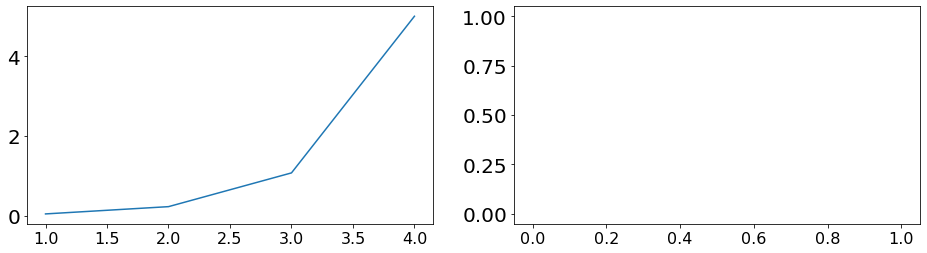

In [ ]:
### logspace
### compare to logspace(1,2,num=4) => 10^1, 10^1.33, 10^1.66, 10^2
### equal to   logspace(log10(10), log10(100)): 10, 100 are real values in the list
etas = np.logspace(np.log10(0.05), np.log10(5.), num=4)  
print(etas)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(np.arange(1,5), etas)
ax2.plot()
plt.show()

f_pre(z=1.0) = 1.0   is weight
f_pre(z=4.0) = 0.125   is weight
[[0.005, 1.0, 1.0], [0.005, 1.0, -1.0], [0.005, 4.0, 1.0], [0.005, 4.0, -1.0]]


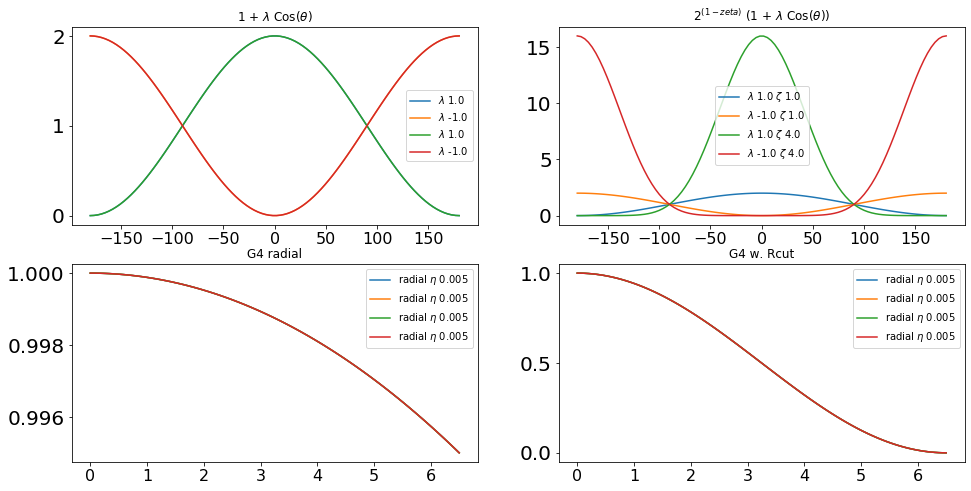

In [ ]:
### G4: angle in inline with subplots(2,2)
%matplotlib inline

fig, ax = plt.subplots(2,2, figsize=(16,8))

### G4 parameters
eta_g4 = 0.005
lambdas = [1.0, -1.0]
zetas  = [1.0, 4.0]         # zeta is weight: 1 for normal, 4 for weak angular effect
ang   = np.linspace(-np.pi, np.pi, 100)

G4p   = []
for zeta in zetas:   # zeta is lammbda in paper
    f_g4_pre  = 2 ** (1-zeta)
    print(f"f_pre(z={zeta}) = {f_g4_pre}   is weight")
    for lambd in lambdas:
        f_ang      = ( 1 + lambd*np.cos(ang))
        f_ang_pre  = f_g4_pre * f_ang
        f_ang_zeta = f_ang**zeta
        f_rad      = np.exp( -eta_g4 * Rij**2 / Rc**2) 
        f_rad_c    = f_rad * fc
          
        G4p.append([eta_g4, zeta, lambd])
        ax[0,0].plot(np.degrees(ang), f_ang, label=f'$\lambda$ {lambd}')
        ax[0,0].set_title(r"1 + $\lambda$ Cos($\theta$)")
        ax[0,1].plot(np.degrees(ang), f_ang_zeta, label=f'$\lambda$ {lambd} $\zeta$ {zeta}')
        ax[0,1].set_title(r"2$^{(1-zeta)}$ (1 + $\lambda$ Cos($\theta$))")
        ax[1,0].plot(Rij, f_rad, label=f'radial $\eta$ {eta_g4}')
        ax[1,0].set_title("G4 radial")
        ax[1,1].plot(Rij, f_rad_c, label=f'radial $\eta$ {eta_g4}')
        ax[1,1].set_title("G4 w. Rcut")
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
print(G4p)

plt.show()

  === AMP style ===
      Rc^2 is inside of calculate_G2


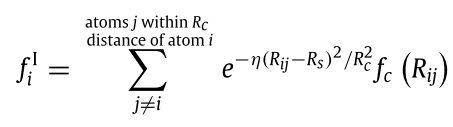

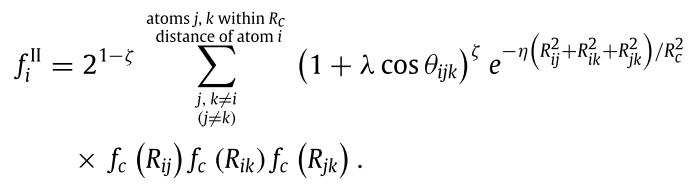

In [ ]:
from IPython.display import Image, display
print("  === AMP style ===")
print("      Rc^2 is inside of calculate_G2")
display(Image(filename='files/fG2_amp.png', width=300, height=100))
display(Image(filename='files/fG4_amp.png', width=500, height=200))

f_pre(z=1.0) = 1.0   is weight
f_pre(z=2.0) = 0.5   is weight
f_pre(z=4.0) = 0.125   is weight
f_pre(z=8.0) = 0.0078125   is weight
[[0.005, 1.0, 1.0], [0.005, 1.0, -1.0], [0.005, 2.0, 1.0], [0.005, 2.0, -1.0], [0.005, 4.0, 1.0], [0.005, 4.0, -1.0], [0.005, 8.0, 1.0], [0.005, 8.0, -1.0]]


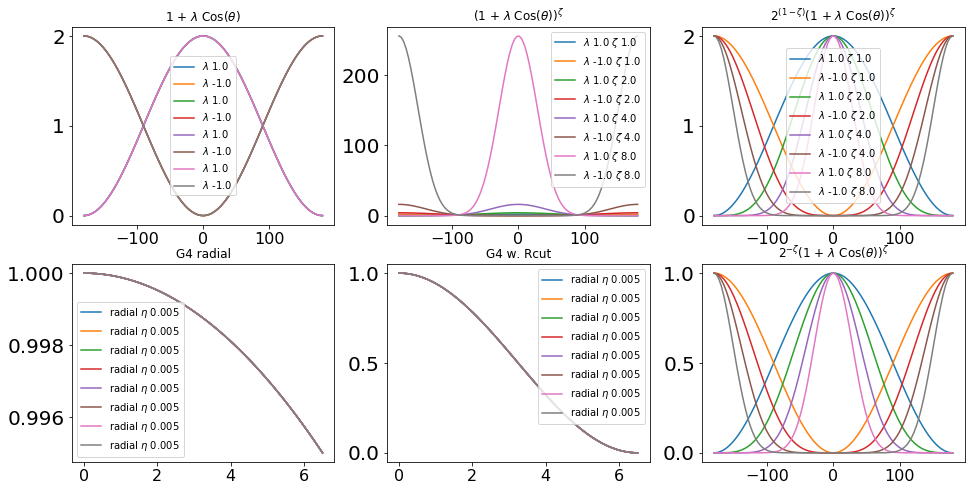

In [ ]:
### G4: angle in inline
%matplotlib inline
### 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(2,3, figsize=(16,8))
### G4 parameters
eta_g4 = 0.005
lambdas = [1.0, -1.0]
zetas  = [1.0, 4.0]         # zeta is weight: 1 for normal, 4 for weak angular effect
ang   = np.linspace(-np.pi, np.pi, 100)

G4p   = []
for zeta in zetas:   # zeta is lammbda in paper
    f_pre  = 2 ** (1-zeta)
    f_prenew = 2**(-zeta)
    print(f"f_pre(z={zeta}) = {f_pre}   is weight")
    for lambd in lambdas:
        f_ang      = ( 1 + lambd*np.cos(ang))            # [0,0] lambda-dependent
        f_ang2zeta = f_ang**zeta
        f_ang_all  = f_pre * f_ang2zeta
        f_ang_allnew= f_prenew * f_ang2zeta
        f_rad      = np.exp( -eta_g4 * Rij**2 / Rc**2) 
        f_rad_c    = f_rad * fc
          
        G4p.append([eta_g4, zeta, lambd])
        ax[0,0].plot(np.degrees(ang), f_ang, label=f'$\lambda$ {lambd}')
        ax[0,0].set_title(r"1 + $\lambda$ Cos($\theta$)")
        ax[0,1].plot(np.degrees(ang), f_ang2zeta, label=f'$\lambda$ {lambd} $\zeta$ {zeta}')
        ax[0,1].set_title(r"(1 + $\lambda$ Cos($\theta$))$^\zeta$")
        ax[0,2].plot(np.degrees(ang), f_ang_all, label=f'$\lambda$ {lambd} $\zeta$ {zeta}')
        ax[0,2].set_title(r"2$^{(1-\zeta)}$(1 + $\lambda$ Cos($\theta$))$^\zeta$")
        ax[1,0].plot(Rij, f_rad, label=f'radial $\eta$ {eta_g4}')
        ax[1,0].set_title("G4 radial")
        ax[1,1].plot(Rij, f_rad_c, label=f'radial $\eta$ {eta_g4}')
        ax[1,1].set_title("G4 w. Rcut")
        ax[1,2].plot(np.degrees(ang), f_ang_allnew, label=f'$\lambda$ {lambd} $\zeta$ {zeta}')
        ax[1,2].set_title(r"2$^{-\zeta}$(1 + $\lambda$ Cos($\theta$))$^\zeta$")
        #ax[1,2]=fig.add_subplot(2,3,6, projection='3d')
ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend()
ax[1,1].legend()
#ax[1,2].legend()
print(G4p)

### 3D plot
#ax3d.set_data()

plt.show()

In [4]:
mpl.__version__

'3.2.2'